In [66]:
import numpy as np
import scipy.io as sio
from PIL import Image
from numpy import linalg as LA
import matplotlib.pyplot as plt

# load data

mat_contents = sio.loadmat("mnist_digits.mat") # mat_contents['X'].shape = (10000, 784)
dataset = np.concatenate((mat_contents['X'], mat_contents['Y']), axis=1) # X, Y = dataset[:,:-1], dataset[:,-1] 

# split data

def split(dataset, ratio):
    msk = np.random.rand(len(dataset)) < ratio
    return dataset[msk], dataset[~msk]

train_data, test_data = split(dataset, 0.7)

# build percepton

def percepton_train(train_data, max_iter, digit, mode=3):
        
    if len(train_data)==0: return [[]]
    w = np.zeros((len(train_data[0]), 1)) # initialize weights and bias (index = 0)        

    if mode == 0: # Perceptron V0
        
        for i in range(max_iter):

            datapoint = train_data[i%(len(train_data)+1)]
            y = 1 if (datapoint[-1] == digit) else -1
            x = datapoint[:-1]

            if y*x.dot(w[1:])[0] + w[0][0] <= 0:

                w[1:] = w[1:] + y*x.reshape(784,1)
                w[0] = w[0] + y

        return w

    if mode == 1: # Perceptron V1
        
        for i in range(max_iter):
        
            datapoint_min = train_data[0]
            y_min = 1 if (datapoint_min[-1] == digit) else -1
            x_min = datapoint_min[:-1]
            a_min = y_min*x_min.dot(w[1:])[0] + w[0][0]

            for datapoint in train_data:

                y = 1 if (datapoint[-1] == digit) else -1
                x = datapoint[:-1]
                a = y*x.dot(w[1:])[0] + w[0][0]

                if a < a_min:
                    datapoint_min = datapoint
                    y_min = y
                    x_min = x
                    a_min = a

            if a_min <= 0:
                w[1:] = w[1:] + y_min * x_min.reshape(784,1)
                w[0] = w[0] + y_min

        return w

        
    else:
        
        for i in range(max_iter):
            
            for datapoint in train_data:
                
                y = 1 if (datapoint[-1] == digit) else -1
                x = datapoint[:-1]
                
                if y*x.dot(w[1:])[0] + w[0][0] <= 0:
                    
                    w[1:] = w[1:] + y*x.reshape(784,1)
                    w[0] = w[0] + y
        
        return w



def percepton_test(test_datapoint, w):
    
    return np.sign(test_datapoint[:-1].dot(w[1:])[0] + w[0][0])
    
    

def percepton_accuracy(train_data, test_data, max_iter, digit, mode=3):
    
    count = 0
    total = len(test_data)
    if total==0: return 0
    w = percepton_train(train_data, max_iter, digit, mode)
    
    for datapoint in test_data:
        
        if (percepton_test(datapoint, w) == 1 and datapoint[-1]==digit) \
        or (percepton_test(datapoint, w) == -1 and datapoint[-1]!=digit):
            count += 1
            
    return count/total

In [3]:
for num in range(10):
    print('For digit {}, the accuracy of V3 is {}.'\
          .format(num, percepton_accuracy(train_data, test_data, 100, num)))

For digit 0, the accuracy of V3 is 0.9785306943978531.
For digit 1, the accuracy of V3 is 0.9818852733981885.
For digit 2, the accuracy of V3 is 0.9577323045957732.
For digit 3, the accuracy of V3 is 0.9543777255954378.
For digit 4, the accuracy of V3 is 0.9698087889969809.
For digit 5, the accuracy of V3 is 0.9111036564911104.
For digit 6, the accuracy of V3 is 0.9755115732975511.
For digit 7, the accuracy of V3 is 0.9795370680979537.
For digit 8, the accuracy of V3 is 0.9308956725930896.
For digit 9, the accuracy of V3 is 0.9365984568936598.


In [5]:
for num in range(10):
    print('For digit {}, the accuracy of V0 is {}.'\
          .format(num, percepton_accuracy(train_data, test_data, 100, num, mode=0)))

For digit 0, the accuracy of V0 is 0.9543777255954378.
For digit 1, the accuracy of V0 is 0.9319020462931902.
For digit 2, the accuracy of V0 is 0.9124454880912446.
For digit 3, the accuracy of V0 is 0.9124454880912446.
For digit 4, the accuracy of V0 is 0.9080845353908085.
For digit 5, the accuracy of V0 is 0.9164709828916471.
For digit 6, the accuracy of V0 is 0.9469976517946997.
For digit 7, the accuracy of V0 is 0.955719557195572.
For digit 8, the accuracy of V0 is 0.7692049647769205.
For digit 9, the accuracy of V0 is 0.8926534719892654.


In [7]:
for num in range(10):
    print('For digit {}, the accuracy of V1 is {}.'\
          .format(num, percepton_accuracy(train_data, test_data, 100, num, mode = 1)))

For digit 0, the accuracy of V1 is 0.9443139885944314.
For digit 1, the accuracy of V1 is 0.8963435088896343.
For digit 2, the accuracy of V1 is 0.2408587722240859.
For digit 3, the accuracy of V1 is 0.1294867494129487.
For digit 4, the accuracy of V1 is 0.39885944313988597.
For digit 5, the accuracy of V1 is 0.7544448171754444.
For digit 6, the accuracy of V1 is 0.9094263669909426.
For digit 7, the accuracy of V1 is 0.915129151291513.
For digit 8, the accuracy of V1 is 0.13217041261321705.
For digit 9, the accuracy of V1 is 0.8453539080845354.


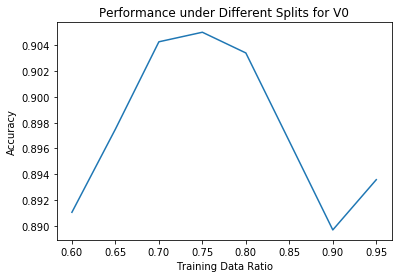

In [19]:
# Plot accuracy against ratio, 
# model: v0
# avarage of N runs

N = 10
ITER = 100
x_data = np.arange(0.6, 1.0, 0.05)
y_data = []

for n in range(N):
    y_ = []
    for ratio in x_data:
        train_data, test_data = split(dataset, ratio)
        a = []
        for digit in range(10):
            a.append(percepton_accuracy(train_data, test_data, ITER, digit, mode=0))
        y_.append(np.mean(a))

    y_data.append(y_)
    
y_data = np.mean(y_data, axis=0)

plt.plot(x_data, y_data)
plt.xlabel('Training Data Ratio')
plt.ylabel('Average Accuracy across Digits')
plt.title('Average Performance under Different Splits for V0')
plt.savefig('splits_v0_smoothed.png')

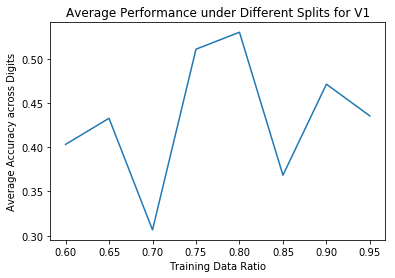

In [48]:
# Plot accuracy against ratio, 
# model: v1
# avarage of N runs

N = 1
ITER = 10
x_data = np.arange(0.6, 1.0, 0.05)
y_data = []

for n in range(N):
    y_ = []
    for ratio in x_data:
        train_data, test_data = split(dataset, ratio)
        a = []
        for digit in range(10):
            a.append(percepton_accuracy(train_data, test_data, ITER, digit, mode=1))
        y_.append(np.mean(a))

    y_data.append(y_)
    
y_data = np.mean(y_data, axis=0)

plt.plot(x_data, y_data)
plt.xlabel('Training Data Ratio')
plt.ylabel('Average Accuracy across Digits')
plt.title('Average Performance under Different Splits for V1')
plt.savefig('splits_v1_smoothed.png')

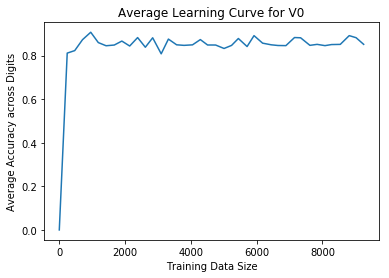

In [64]:
# Plot accuracy against data size
# model: v0

ITER = 10
RATIO = 0.75
thresholds = np.arange(1, len(dataset), 250)
plot_data = {}

for threshold in thresholds:
    msk = np.random.rand(len(dataset[:threshold])) < ratio
    train_data = dataset[:threshold][msk] if len(dataset[:threshold][msk]) > 0 else []
    test_data = dataset[:threshold][~msk] if len(dataset[:threshold][~msk]) > 0 else []
    a = []
    for digit in range(10):
        a.append(percepton_accuracy(train_data, test_data, ITER, digit, mode=0))
    plot_data[len(train_data)] = np.mean(a)

sorted_data = np.array(sorted(plot_data.items()))
plt.plot(sorted_data[:,0], sorted_data[:,1])
plt.xlabel('Training Data Size')
plt.ylabel('Average Accuracy across Digits')
plt.title('Average Learning Curve for V0')
plt.savefig('average_learning_v0.png')

In [ ]:
# Plot accuracy against data size
# model: v1

ITER = 10
RATIO = 0.75
thresholds = np.arange(1, len(dataset), 250)
plot_data = {}

for threshold in thresholds:
    msk = np.random.rand(len(dataset[:threshold])) < ratio
    train_data = dataset[:threshold][msk] if len(dataset[:threshold][msk]) > 0 else []
    test_data = dataset[:threshold][~msk] if len(dataset[:threshold][~msk]) > 0 else []
    a = []
    for digit in range(10):
        a.append(percepton_accuracy(train_data, test_data, ITER, digit, mode=1))
    plot_data[len(train_data)] = np.mean(a)

sorted_data = np.array(sorted(plot_data.items()))
plt.plot(sorted_data[:,0], sorted_data[:,1])
plt.xlabel('Training Data Size')
plt.ylabel('Average Accuracy across Digits')
plt.title('Average Learning Curve for V0')
plt.savefig('average_learning_v0.png')